# Import library

In [1]:
import librosa
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Visualize audio 

In [24]:
audio_path = 'queen/queen_10.wav'
ipd.Audio(audio_path)

In [25]:
signal, sr = librosa.load(audio_path, sr = 16000)

In [26]:
signal.shape

(32000,)

In [27]:
signal

array([-0.00276399, -0.00211883, -0.00175047, ...,  0.00222039,
        0.00220418,  0.00244856], dtype=float32)

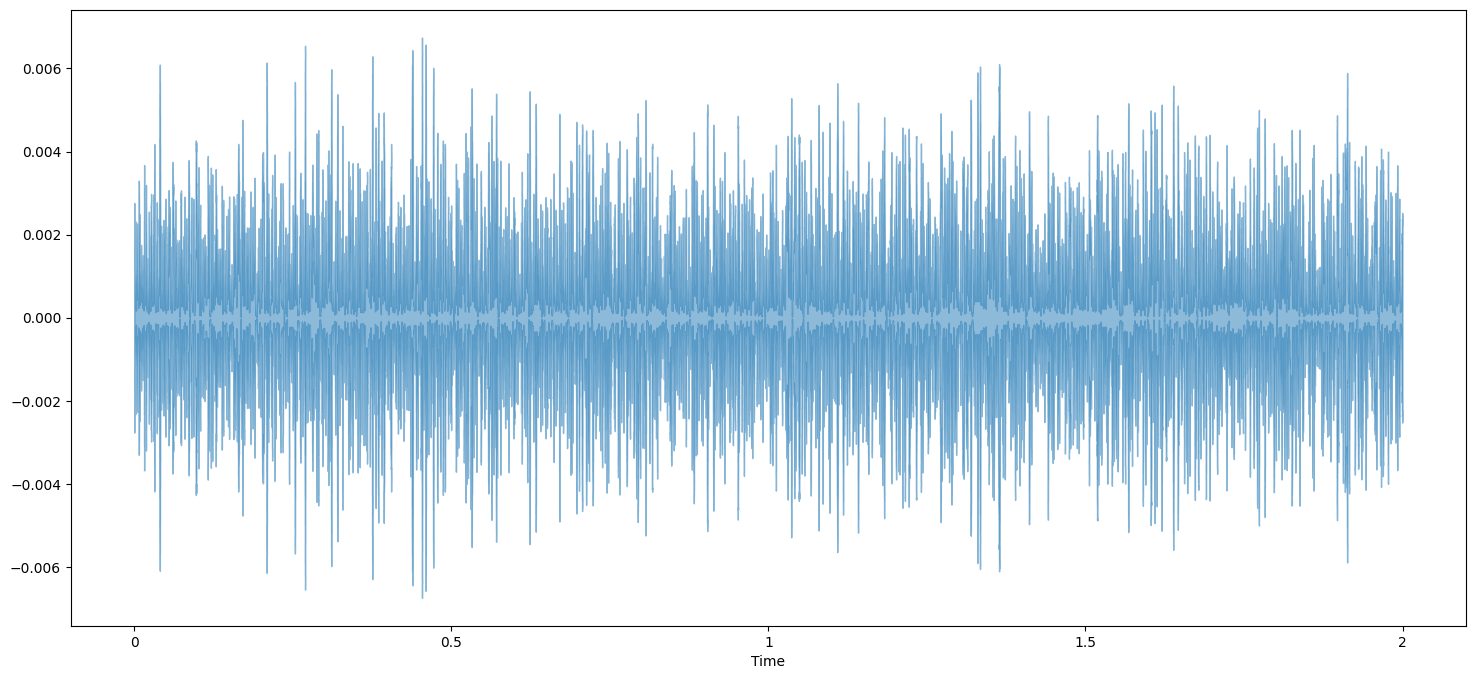

In [28]:
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [29]:
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr , len(magnitude))

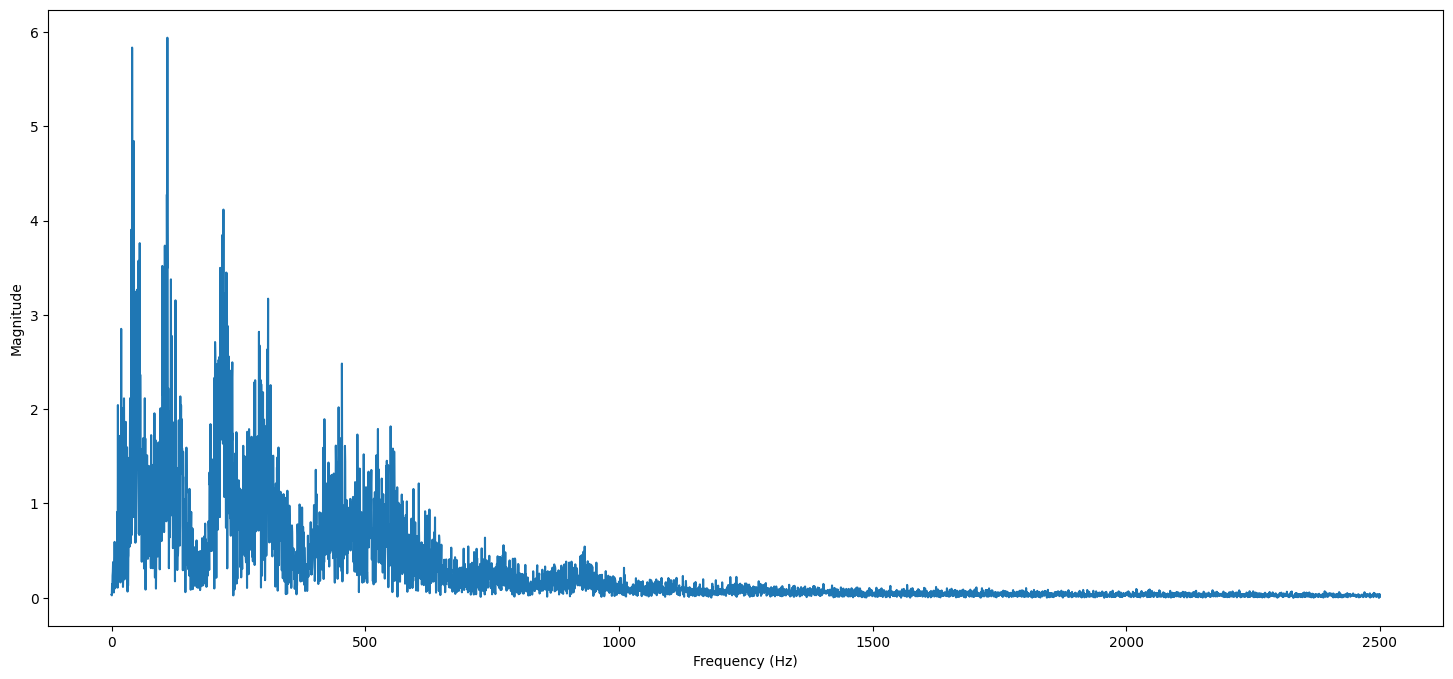

In [30]:
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Extract Features with Fast Fouries Transform

In [6]:
import os
import numpy as np
import librosa

def fft_extract(filename):
    y, sr = librosa.load(filename, sr=16000)
    fft = np.abs(np.fft.fft(y))
    fft_feature = np.ndarray.flatten(fft)
    return fft_feature

folder_path = 'data/val/Queenless'
save_folder = 'fft_npa/val/Queenless_FFT'
os.makedirs(save_folder, exist_ok=True)

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]


all_fft_features = []

for wav_file in wav_files:
    filename = os.path.join(folder_path, wav_file)
    fft_features = fft_extract(filename)
    all_fft_features.append(fft_features)


combined_save_path = os.path.join(save_folder, 'Queenless_val_fft.npy')
np.save(combined_save_path, np.array(all_fft_features))

print('Extract Features Successfully  !!! ')


Extract Features Successfully and Combined into a Single File !!! 
